#Treinamento de classificação e detecção de classes utilizando YoloV5#

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.3/107.7 GB disk)


In [2]:
!unzip -u "/content/yolo-image-detection.zip" -d "/content"

Archive:  /content/yolo-image-detection.zip
   creating: /content/yolo-image-detection/
   creating: /content/yolo-image-detection/.git/
  inflating: /content/yolo-image-detection/.git/COMMIT_EDITMSG  
  inflating: /content/yolo-image-detection/.git/config  
  inflating: /content/yolo-image-detection/.git/description  
  inflating: /content/yolo-image-detection/.git/FETCH_HEAD  
  inflating: /content/yolo-image-detection/.git/HEAD  
   creating: /content/yolo-image-detection/.git/hooks/
  inflating: /content/yolo-image-detection/.git/hooks/applypatch-msg.sample  
  inflating: /content/yolo-image-detection/.git/hooks/commit-msg.sample  
  inflating: /content/yolo-image-detection/.git/hooks/fsmonitor-watchman.sample  
  inflating: /content/yolo-image-detection/.git/hooks/post-update.sample  
  inflating: /content/yolo-image-detection/.git/hooks/pre-applypatch.sample  
  inflating: /content/yolo-image-detection/.git/hooks/pre-commit.sample  
  inflating: /content/yolo-image-detection/.git

In [3]:
import torch
modelo = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-7-25 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 141MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


##Resultado do modelo sem a nova camada de treinamento##

uma jaguatirica foi reconhecida como zebra.

um lobo-guara foi reconhecido como cachorro.

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


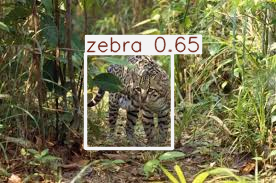

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


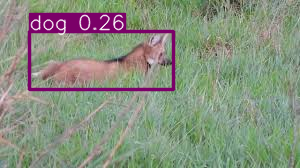

In [4]:
jaguatirica = '/content/yolo-image-detection/jaguatirica.jpg'
resultado = modelo(jaguatirica)
resultado.show()

lobo_guara = '/content/yolo-image-detection/lobo-guara.jpg'
resultado = modelo(lobo_guara)
resultado.show()

In [5]:
# importar yolov5 do git
import os
if(not os.path.exists('yolov5')):
  !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 17516 (delta 7), reused 0 (delta 0), pack-reused 17496 (from 4)
Receiving objects: 100% (17516/17516), 16.62 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (12002/12002), done.


In [6]:
# instalar as bibliotecas necessárias
!pip install -r /content/yolov5/requirements.txt

In [1]:
#treinar o modelo com as novas classes
#executar o train.py que veio do repositório, de finir tamanho da imagem, bratch e épocas, apontar o arquivo de configuração com as informações para o treinamento, escolher o peso do yolov5s, congelar camadas para treinamento mais rápido
!python /content/yolov5/train.py --img 320 --batch 16 --epochs 35 --data /content/yolo-image-detection/config.yaml --weights yolov5s.pt --freeze 10

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-07-25 20:43:37.115184: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753476217.383583    1594 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753476217.452022    1594 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose "Don't visualize my results"
train: weights=yolov5s.pt, cfg=, data=/content/yolo-image-detection/confi

In [2]:
#buscar qual execução de experimento foi, para executalo com novas imagens
import os
diretorio = "/content/yolov5/runs/train/"
experimento = [pasta for pasta in os.listdir(diretorio)
           if os.path.isdir(os.path.join(diretorio, pasta)) and pasta.startswith('exp')][0]
treino = f'/content/yolov5/runs/train/{experimento}/weights/best.pt'

In [3]:
#executar detecção com o peso do treinamento gerado para as imagens na pasta de testes
!python yolov5/detect.py --weights {treino} --source /content/yolo-image-detection/testes

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolo-image-detection/testes, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/18 /content/yolo-image-detection/testes/image_105.jpg: 640x576 3 lobo-guaras, 682.1ms
image 2/18 /content/yolo-image-detection/testes/image_115.jpg: 480x640 1 jaguatirica, 1 lobo-guara, 342.4ms
image 3/18 /content/yolo-image-detection/testes/image_148.jpg: 640x576 (no detections), 4

In [5]:
#exibir resultado
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

resultado_caminho = f"/content/yolov5/runs/detect/{experimento}"
imagens = [f for f in os.listdir(resultado_caminho) if f.endswith(('.png', '.jpg', '.jpeg'))]
num_imagens = len(imagens)

colunas = 3
linhas = (num_imagens // colunas) + (num_imagens % colunas > 0)  # Calculate rows dynamically
fig, axes = plt.subplots(linhas, colunas, figsize=(240, 120))

axes = axes.flatten()
for i, image_file in enumerate(imagens):
    caminho_imagem = os.path.join(resultado_caminho, image_file)
    img = mpimg.imread(caminho_imagem)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(image_file)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

###Resultados###
o resultado do treino não foi tão eficiente, porém melhor que a definição padrão do yolov5.

Isso demonstra a importância de um bom dataset, este foi limitado com cerca de 100 imagens para cada animal, mas para objetivo de conhecimento e treinamento da geração do dataset para detecção de classes cumpriu a função.